**Name : Aishwarya Bhavsar**<br>
**CECS 457 - Applied Machine Learning**<br>
**Bank Marketing Data**<br>
**Date: 11/13/2022**

# **Pre-processing**

**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [204]:
data=pd.read_csv('/content/bank-direct-marketing-campaigns.csv',sep=',')
data.shape

(41188, 20)

In [205]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Feature Engineering**

In [ ]:
data.drop(['contact','month','day_of_week','default','pdays',],axis=1,inplace=True)
data.head(5)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.shape

(41188, 15)

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

**Visualizing the Data**

no     36548
yes     4640
Name: y, dtype: int64


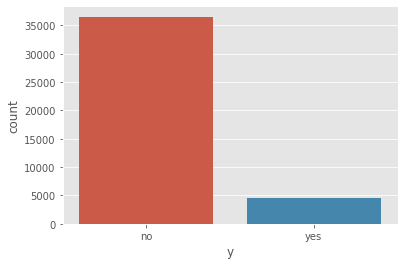

In [ ]:
print(data.y.value_counts())
sns.countplot(x='y', data=data)

**This is highly imbalanced dataset accuracy can't work well with imbalanced data so we can choose AUC as metric**

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


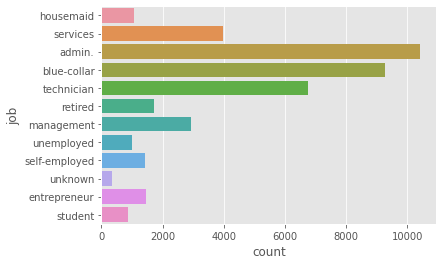

In [ ]:
print(data.job.value_counts())
sns.countplot(y='job', data=data)

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


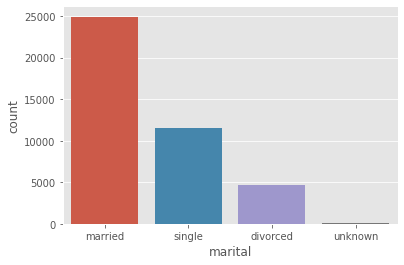

In [ ]:
print(data.marital.value_counts())
sns.countplot(x='marital', data=data)

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64


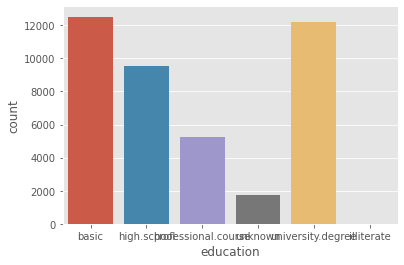

In [ ]:
print(data.education.value_counts())
sns.countplot(x='education', data=data)

In [ ]:
data.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data.shape

(41188, 15)

**Label Encoder**

In [ ]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
y = data['y']

In [ ]:
data.drop(['y'], axis = 1, inplace = True) 

In [ ]:
data.head(2)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
data.shape

(41188, 14)

In [ ]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

**Split The Data**

In [ ]:
#splitting the data 
x_train, le_x_test, y_train, le_y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
le_x_train, le_x_cv, le_y_train, le_y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(le_x_train.shape,le_x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(le_y_train.shape,le_y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(le_x_cv.shape,le_y_cv.shape))

the shape of x_train data,(26360, 14) and shape of x_test data (8238, 14):
the shape of y_train data,(26360,) and shape of y_test data (8238,):
the shape of x_cv data,(6590, 14) and shape of y_cv data (6590,):


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['job'])

LabelEncoder()

In [ ]:
le_x_train.job = le.transform(le_x_train.job)
le_x_test.job = le.transform(le_x_test.job)
le_x_cv.job = le.transform(le_x_cv.job)

In [ ]:
le = LabelEncoder()
le.fit(data['marital'])
le_x_train.marital = le.transform(le_x_train.marital)
le_x_test.marital = le.transform(le_x_test.marital)
le_x_cv.marital = le.transform(le_x_cv.marital)

In [ ]:
le = LabelEncoder()
le.fit(data['education'])
le_x_train.education = le.transform(le_x_train.education)
le_x_test.education = le.transform(le_x_test.education)
le_x_cv.education = le.transform(le_x_cv.education)

In [ ]:
le = LabelEncoder()
le.fit(data['housing'])
le_x_train.housing = le.transform(le_x_train.housing)
le_x_test.housing = le.transform(le_x_test.housing)
le_x_cv.housing = le.transform(le_x_cv.housing)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
le = LabelEncoder()
le.fit(data['loan'])
le_x_train.loan = le.transform(le_x_train.loan)
le_x_test.loan = le.transform(le_x_test.loan)
le_x_cv.loan = le.transform(le_x_cv.loan)

In [ ]:
le = LabelEncoder()
le.fit(data['poutcome'])
le_x_train.poutcome = le.transform(le_x_train.poutcome)
le_x_test.poutcome = le.transform(le_x_test.poutcome)
le_x_cv.poutcome = le.transform(le_x_cv.poutcome)

In [ ]:
le_x_train.head(2)

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
14088,29,1,1,0,2,0,2,0,1,1.4,93.918,-42.7,4.962,5228.1
7027,38,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.860,5191.0


# <font size='18'> **Machine Learning Models - Label Encoder**

# **1. KNN - Brute Force**

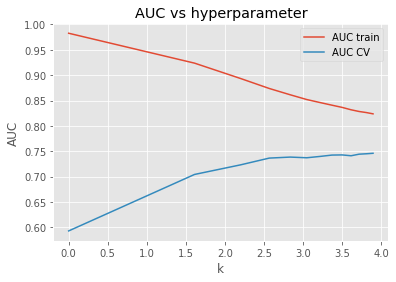

optimal alpha for which auc is maximum :  49


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

In [ ]:
from sklearn.metrics import confusion_matrix

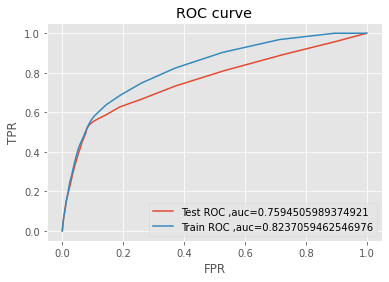

AUC on Test data is 0.7594505989374921
AUC on Train data is 0.8237059462546976
---------------------------


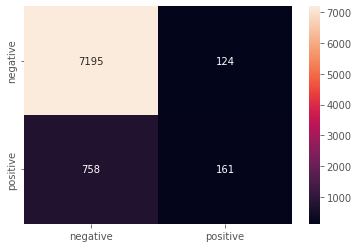

In [ ]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
results=pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 37",0.8288,0.7587]
results.loc[0] = new

# **2. KNN - KD TREE**

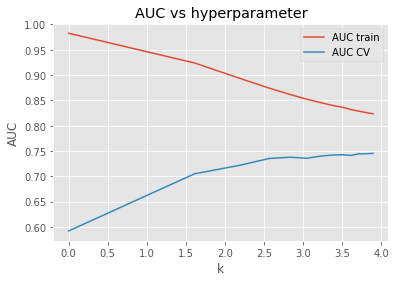

optimal alpha for which auc is maximum :  49


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

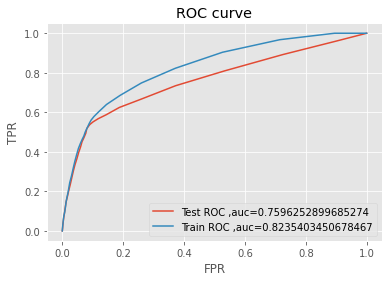

AUC on Test data is 0.7596252899685274
AUC on Train data is 0.8235403450678467
---------------------------


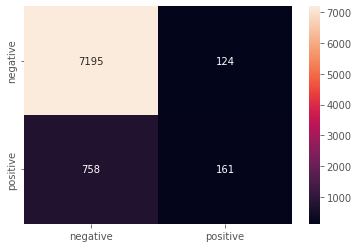

In [ ]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 33",0.8322,0.7573]
results.loc[1] = new

# **3. Logistic Regression with L1 regularization**

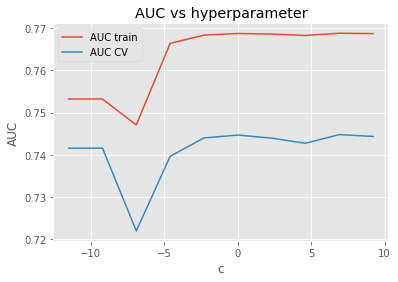

optimal c for which auc is maximum :  1000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

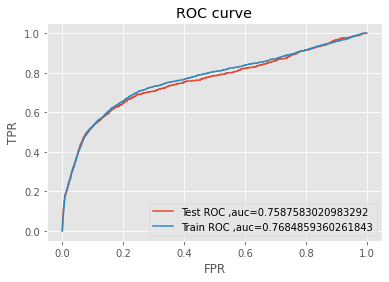

AUC on Test data is 0.7587583020983292
AUC on Train data is 0.7684859360261843
---------------------------


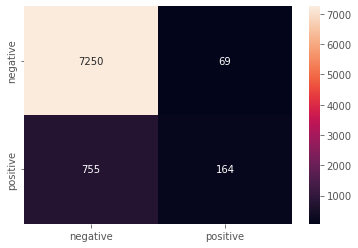

In [ ]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l1',C=optimal_c, solver='liblinear')
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

**Top 5 important features of subscribed class**

In [ ]:
all_features = x_train.columns

In [ ]:
all_features

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

In [ ]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

neg_indx = np.argsort(weight)

print('Top 5 subscribed features :')
for i in list(pos_indx[0][0:5]):
    print(all_features[i])
    

Top 5 subscribed features :
poutcome
previous
cons.price.idx
marital
education


In [ ]:
new = ['Logistic Regression with L1','LogisticRegression',"c = 10000",0.7642,0.7593]
results.loc[2] = new

# **4. Logistic Regression with L2 regularization**

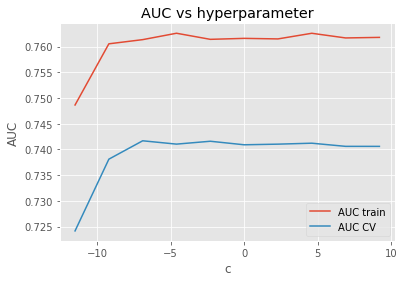

optimal c for which auc is maximum :  0.001


In [ ]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

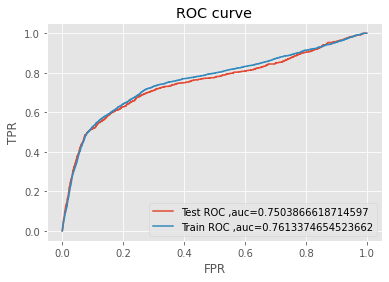

AUC on Test data is 0.7503866618714597
AUC on Train data is 0.7613374654523662
---------------------------


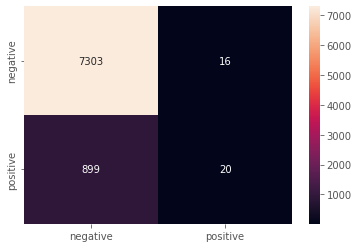

In [ ]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

**5 important features of subscribed class**

In [ ]:
all_features = x_train.columns

In [ ]:
weight = clf.coef_
pos_indx = np.argsort(weight)[:,::-1]

neg_indx = np.argsort(weight)

print('Top 5 subscribed features :')
for i in list(pos_indx[0][0:5]):
    print(all_features[i])

Top 5 subscribed features :
cons.price.idx
previous
poutcome
education
cons.conf.idx


**5 important features of not subscribed class**

In [ ]:
print('Top 5 not subscribed features :')
for i in list(neg_indx[0][:5]):
    print(all_features[i])

Top 5 not subscribed features :
euribor3m
emp.var.rate
campaign
job
loan


In [ ]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 10",0.7644,0.7595]
results.loc[3] = new

# **5. Linear SVM**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

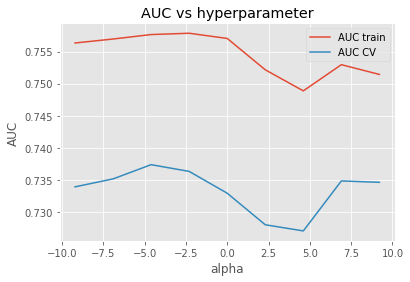

optimal alpha for which auc is maximum :  0.01


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

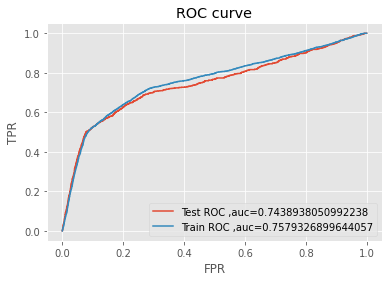

AUC on Test data is 0.7438938050992238
AUC on Train data is 0.7579326899644057
---------------------------


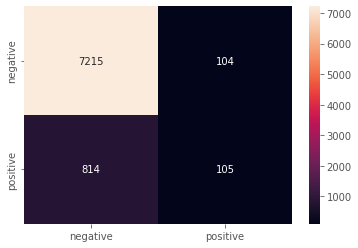

In [ ]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
all_features = x_train.columns
clf = SGDClassifier(alpha=0.01)
clf.fit(le_x_train,le_y_train)
weight = clf.coef_
positive_index=np.argsort(weight)[:,::-1]

negative_index=np.argsort(weight)

print('Top 10 subscribed features :')
for i in list(positive_index[0][0:10]):
    print(all_features[i])
    
print("----------------")

#top 10 negative features
print('Top 10 not subscribed features :')
for i in list(negative_index[0][0:10]):
    print(all_features[i])

Top 10 subscribed features :
cons.price.idx
poutcome
cons.conf.idx
previous
education
marital
job
housing
age
loan
----------------
Top 10 not subscribed features :
euribor3m
emp.var.rate
campaign
nr.employed
loan
age
housing
job
marital
education


In [ ]:
new = ['Linear SVM','SGDClassifier',"alpha = 0.01",0.7537,0.7434]
results.loc[4] = new

# **6. RBF SVM**

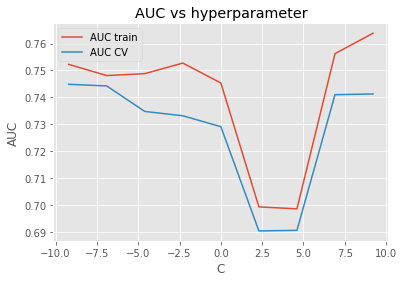

optimal C for which auc is maximum :  [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]


In [ ]:
from sklearn.svm import SVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(le_x_train,le_y_train)
    prob_cv = clf.predict_proba(le_x_cv)[:,1]
    cv_auc.append(roc_auc_score(le_y_cv,prob_cv))
    prob_train = clf.predict_proba(le_x_train)[:,1]
    train_auc.append(roc_auc_score(le_y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',C)

In [ ]:
print('optimal C for which auc is maximum : ',optimal_C)

optimal C for which auc is maximum :  0.0001


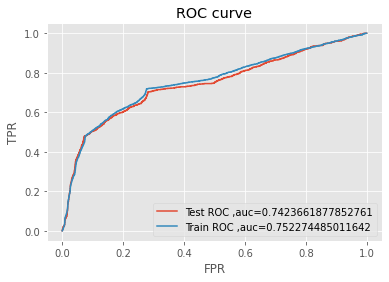

AUC on Test data is 0.7423661877852761
AUC on Train data is 0.752274485011642
---------------------------


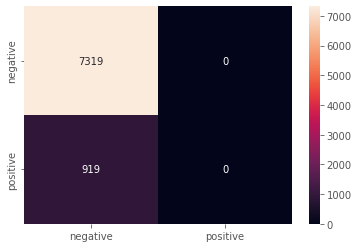

In [ ]:
#Testing AUC on Test data
model =SVC(C = optimal_C)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(le_x_train,le_y_train)
pred_test = clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(le_y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
new = ['RBF SVM','SVC',"c = 0.01",0.8771,0.7272]
results.loc[5] = new

# **7. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 10


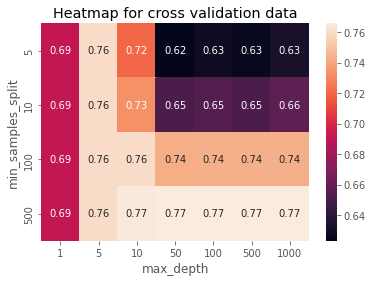

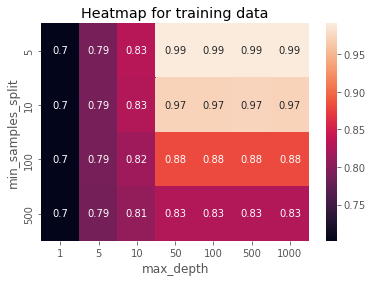

In [ ]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

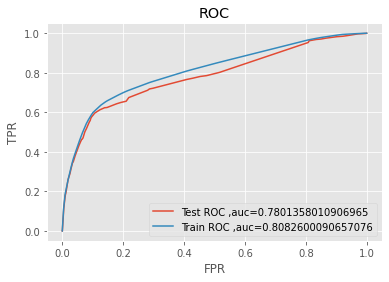

AUC on Test data is 0.7801358010906965
AUC on Train data is 0.8082600090657076
---------------------------


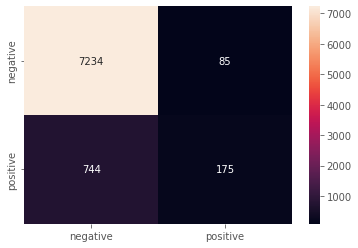

In [ ]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
#Top important features
all_features = x_train.columns

feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    print(all_features[i])

nr.employed
poutcome
euribor3m
cons.conf.idx
age
cons.price.idx
previous
education
campaign
marital
job
emp.var.rate
housing
loan


In [ ]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 10 & min_samples_split = 500",0.8131,0.7925]
results.loc[6] = new

# **8. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 100
optimal max_depth 10


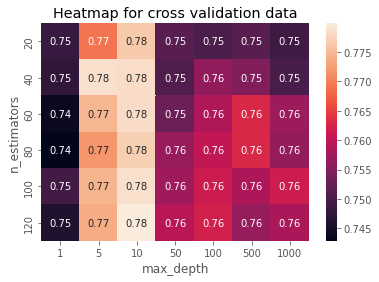

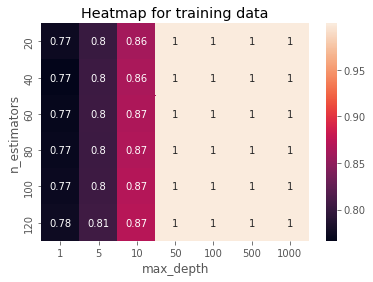

In [ ]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [ ]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

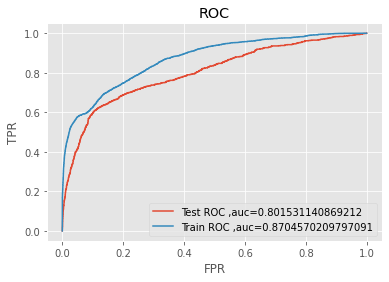

AUC on Test data is 0.801531140869212
AUC on Train data is 0.8704570209797091
---------------------------


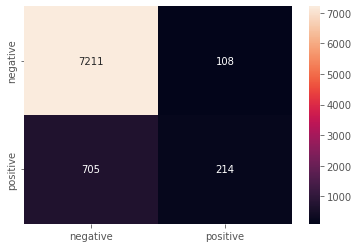

In [ ]:
#training our model for max_depth=10,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

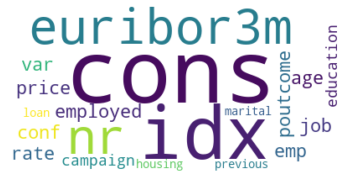

In [ ]:
# worldcloud of top important features
all_features = x_train.columns
data = ''
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    data += all_features[i]
    data += ' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 100",0.8650, 0.8035]
results.loc[7] = new

# **9. XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(le_x_train,le_y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 60
optimal max_depth 5


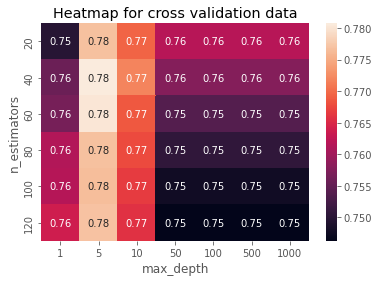

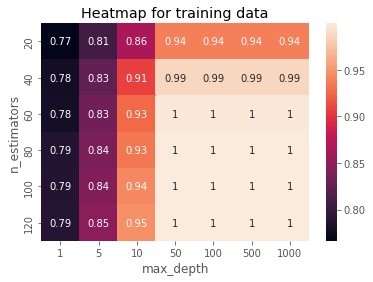

In [ ]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(le_x_train,le_y_train)
        pred_cv = clf.predict_proba(le_x_cv)[:,1]
        pred_train = clf.predict_proba(le_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(le_y_cv,pred_cv))
        train_auc.append(roc_auc_score(le_y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

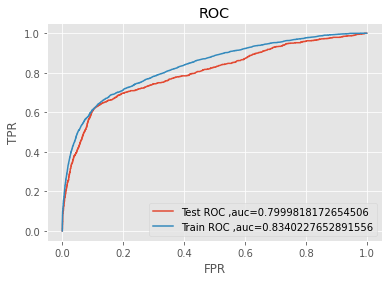

AUC on Test data is 0.7999818172654506
AUC on Train data is 0.8340227652891556
---------------------------


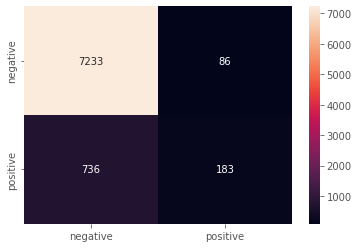

In [ ]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 60)
clf.fit(le_x_train,le_y_train)
pred_test =clf.predict_proba(le_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(le_y_test, pred_test)
pred_train = clf.predict_proba(le_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(le_y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(le_y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(le_y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(le_y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(le_y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(le_y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

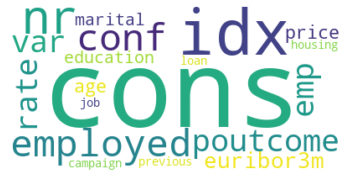

In [ ]:
# worldcloud of top 20 important features
all_features = x_train.columns
data = ''
feat = clf.feature_importances_
features = np.argsort(feat)[::-1]
for i in features[0:20]:
    data += all_features[i]
    data += ' '
    
    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(data)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
new = ['XGBOOST','XGBClassifier',"max_depth = 5 & n_estimators = 60",0.8267,0.8091]
results.loc[8] = new

In [ ]:
results

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 37,0.8288,0.7587
1,KNN with kd-tree,KNeighborsClassifier,k = 33,0.8322,0.7573
2,Logistic Regression with L1,LogisticRegression,c = 10000,0.7642,0.7593
3,Logistic Regression with L2,LogisticRegression,c = 10,0.7644,0.7595
4,Linear SVM,SGDClassifier,alpha = 0.01,0.7537,0.7434
5,RBF SVM,SVC,c = 0.01,0.8771,0.7272
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8131,0.7925
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 100,0.8650,0.8035
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 60,0.8267,0.8091


# <font size='18'> **Machine Learning Models - OneHot Encoder**

# **One Hot Encoder**

In [ ]:
y_valus = {'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
y = data['y']

In [ ]:
data.drop(['y'], axis = 1, inplace = True) 

In [ ]:
data.shape

(41188, 19)

In [ ]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [ ]:
#splitting the data 
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(y_train.shape,y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(x_cv.shape,y_cv.shape))

the shape of x_train data,(26360, 19) and shape of x_test data (8238, 19):
the shape of y_train data,(26360,) and shape of y_test data (8238,):
the shape of x_cv data,(6590, 19) and shape of y_cv data (6590,):


In [ ]:
import sklearn
sklearn.preprocessing.OneHotEncoder

sklearn.preprocessing._encoders.OneHotEncoder

In [ ]:
#Numerical features
real_feature_x_train_age = ['age']
real_feature_x_train_campaign = ['campaign']
real_feature_x_train_previous = ['previous']
real_feature_x_train_emp_var_rate = ['emp.var.rate']
real_feature_x_train_cons_price_idx = ['cons.price.idx']
real_feature_x_train_cons_conf_idx = ['cons.conf.idx']
real_feature_x_train_euribor3m = ['euribor3m']
real_feature_x_train_nr_employed = ['nr.employed']

real_feature_x_test_age = ['age']
real_feature_x_test_campaign = ['campaign']
real_feature_x_test_previous = ['previous']
real_feature_x_test_emp_var_rate = ['emp.var.rate']
real_feature_x_test_cons_price_idx = ['cons.price.idx']
real_feature_x_test_cons_conf_idx = ['cons.conf.idx']
real_feature_x_test_euribor3m = ['euribor3m']
real_feature_x_test_nr_employed = ['nr.employed']

real_feature_x_cv_age = ['age']
real_feature_x_cv_campaign = ['campaign']
real_feature_x_cv_previous = ['previous']
real_feature_x_cv_emp_var_rate = ['emp.var.rate']
real_feature_x_cv_cons_price_idx = ['cons.price.idx']
real_feature_x_cv_cons_conf_idx = ['cons.conf.idx']
real_feature_x_cv_euribor3m = ['euribor3m']
real_feature_x_cv_nr_employed = ['nr.employed']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS = StandardScaler()
x_train_real_feature_age_scale = SS.fit_transform(x_train[real_feature_x_train_age])
x_test_real_feature_age_scale = SS.fit_transform(x_test[real_feature_x_test_age])
x_cv_real_feature_age_scale = SS.fit_transform(x_cv[real_feature_x_cv_age])

In [ ]:
x_train_real_feature_campaign_scale = SS.fit_transform(x_train[real_feature_x_train_campaign])
x_test_real_feature_campaign_scale = SS.fit_transform(x_test[real_feature_x_test_campaign])
x_cv_real_feature_campaign_scale = SS.fit_transform(x_cv[real_feature_x_cv_campaign])

In [ ]:
x_train_real_feature_previous_scale = SS.fit_transform(x_train[real_feature_x_train_previous])
x_test_real_feature_previous_scale = SS.fit_transform(x_test[real_feature_x_test_previous])
x_cv_real_feature_previous_scale = SS.fit_transform(x_cv[real_feature_x_cv_previous])

In [ ]:
x_train_real_feature_emp_var_rate_scale = SS.fit_transform(x_train[real_feature_x_train_emp_var_rate])
x_test_real_feature_emp_var_rate_scale = SS.fit_transform(x_test[real_feature_x_test_emp_var_rate])
x_cv_real_feature_emp_var_rate_scale = SS.fit_transform(x_cv[real_feature_x_cv_emp_var_rate])

In [ ]:
x_train_real_feature_cons_price_idx_scale = SS.fit_transform(x_train[real_feature_x_train_cons_price_idx])
x_test_real_feature_cons_price_idx_scale = SS.fit_transform(x_test[real_feature_x_test_cons_price_idx])
x_cv_real_feature_cons_price_idx_scale = SS.fit_transform(x_cv[real_feature_x_cv_cons_price_idx])

In [ ]:
x_train_real_feature_cons_conf_idx_scale = SS.fit_transform(x_train[real_feature_x_train_cons_conf_idx])
x_test_real_feature_cons_conf_idx_scale = SS.fit_transform(x_test[real_feature_x_test_cons_conf_idx])
x_cv_real_feature_cons_conf_idx_scale = SS.fit_transform(x_cv[real_feature_x_cv_cons_conf_idx])

In [ ]:
x_train_real_feature_euribor3m_scale = SS.fit_transform(x_train[real_feature_x_train_euribor3m])
x_test_real_feature_euribor3m_scale = SS.fit_transform(x_test[real_feature_x_test_euribor3m])
x_cv_real_feature_euribor3m_scale = SS.fit_transform(x_cv[real_feature_x_cv_euribor3m])

In [ ]:
x_train_real_feature_nr_employed_scale = SS.fit_transform(x_train[real_feature_x_train_nr_employed])
x_test_real_feature_nr_employed_scale = SS.fit_transform(x_test[real_feature_x_test_nr_employed])
x_cv_real_feature_nr_employed_scale = SS.fit_transform(x_cv[real_feature_x_cv_nr_employed])

In [ ]:
real_feature_x_train = np.concatenate(
    (x_train_real_feature_age_scale,x_train_real_feature_campaign_scale,x_train_real_feature_previous_scale,
     x_train_real_feature_emp_var_rate_scale,x_train_real_feature_cons_price_idx_scale,x_train_real_feature_cons_conf_idx_scale,
     x_train_real_feature_euribor3m_scale,x_train_real_feature_nr_employed_scale),axis = 1)

real_feature_x_test = np.concatenate(
    (x_test_real_feature_age_scale,x_test_real_feature_campaign_scale,x_test_real_feature_previous_scale,
     x_test_real_feature_emp_var_rate_scale,x_test_real_feature_cons_price_idx_scale,x_test_real_feature_cons_conf_idx_scale,
     x_test_real_feature_euribor3m_scale,x_test_real_feature_nr_employed_scale),axis = 1)

real_feature_x_cv = np.concatenate(
    (x_cv_real_feature_age_scale,x_cv_real_feature_campaign_scale,x_cv_real_feature_previous_scale,
     x_cv_real_feature_emp_var_rate_scale,x_cv_real_feature_cons_price_idx_scale,x_cv_real_feature_cons_conf_idx_scale,
     x_cv_real_feature_euribor3m_scale,x_cv_real_feature_nr_employed_scale),axis = 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [ ]:
cat_feat_x_train_job = x_train['job'].values
cat_feat_x_train_marital = x_train['marital'].values
cat_feat_x_train_education = x_train['education'].values
cat_feat_x_train_housing = x_train['housing'].values
cat_feat_x_train_loan = x_train['loan'].values
cat_feat_x_train_poutcome = x_train['poutcome'].values

cat_feat_x_test_job = x_test['job'].values
cat_feat_x_test_marital = x_test['marital'].values
cat_feat_x_test_education = x_test['education'].values
cat_feat_x_test_housing = x_test['housing'].values
cat_feat_x_test_loan = x_test['loan'].values
cat_feat_x_test_poutcome = x_test['poutcome'].values

cat_feat_x_cv_job = x_cv['job'].values
cat_feat_x_cv_marital = x_cv['marital'].values
cat_feat_x_cv_education = x_cv['education'].values
cat_feat_x_cv_housing = x_cv['housing'].values
cat_feat_x_cv_loan = x_cv['loan'].values
cat_feat_x_cv_poutcome = x_cv['poutcome'].values

In [ ]:
x_train_job = cat_feat_x_train_job.reshape(-1,1)
x_test_job = cat_feat_x_test_job.reshape(-1,1)
x_cv_job = cat_feat_x_cv_job.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_job)
job_train = ohe.transform(x_train_job)
job_test = ohe.transform(x_test_job)
job_cv = ohe.transform(x_cv_job)

In [ ]:
x_train_marital= cat_feat_x_train_marital.reshape(-1,1)
x_test_marital = cat_feat_x_test_marital.reshape(-1,1)
x_cv_marital = cat_feat_x_cv_marital.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_marital)
marital_train = ohe.transform(x_train_marital)
marital_test = ohe.transform(x_test_marital)
marital_cv = ohe.transform(x_cv_marital)

In [ ]:
x_train_education= cat_feat_x_train_education.reshape(-1,1)
x_test_education = cat_feat_x_test_education.reshape(-1,1)
x_cv_education = cat_feat_x_cv_education.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_education)
education_train = ohe.transform(x_train_education)
education_test = ohe.transform(x_test_education)
education_cv = ohe.transform(x_cv_education)

In [ ]:
x_train_housing= cat_feat_x_train_housing.reshape(-1,1)
x_test_housing = cat_feat_x_test_housing.reshape(-1,1)
x_cv_housing= cat_feat_x_cv_housing.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_housing)
housing_train = ohe.transform(x_train_housing)
housing_test = ohe.transform(x_test_housing)
housing_cv = ohe.transform(x_cv_housing)

In [ ]:
x_train_loan = cat_feat_x_train_loan.reshape(-1,1)
x_test_loan = cat_feat_x_test_loan.reshape(-1,1)
x_cv_loan = cat_feat_x_cv_loan.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_loan)
loan_train = ohe.transform(x_train_loan)
loan_test = ohe.transform(x_test_loan)
loan_cv = ohe.transform(x_cv_loan)

In [ ]:
x_train_poutcome = cat_feat_x_train_poutcome.reshape(-1,1)
x_test_poutcome = cat_feat_x_test_poutcome.reshape(-1,1)
x_cv_poutcome = cat_feat_x_cv_poutcome.reshape(-1,1)
ohe =  OneHotEncoder()
ohe.fit(x_train_poutcome)
poutcome_train = ohe.transform(x_train_poutcome)
poutcome_test = ohe.transform(x_test_poutcome)
poutcome_cv = ohe.transform(x_cv_poutcome)

In [ ]:
from scipy.sparse import hstack

In [ ]:
cat_x_train = hstack([job_train,marital_train,education_train,housing_train,loan_train,poutcome_train]).tocsr()
cat_x_test = hstack([job_test,marital_test,education_test,housing_test,loan_test,poutcome_test]).tocsr()
cat_x_cv = hstack([job_cv,marital_cv,education_cv,housing_cv,loan_cv,poutcome_cv]).tocsr()

In [ ]:
cat_x_train.shape

(26360, 33)

In [ ]:
cat_x_test.shape

(8238, 33)

In [ ]:
cat_x_cv.shape

(6590, 33)

In [ ]:
ohe_x_train = hstack([cat_x_train,real_feature_x_train])
ohe_x_test = hstack([cat_x_test,real_feature_x_test])
ohe_x_cv = hstack([cat_x_cv,real_feature_x_cv])

# **1. KNN - Brute Force**

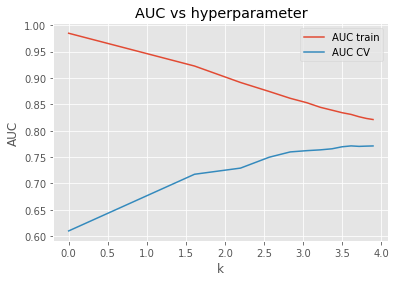

optimal alpha for which auc is maximum :  37


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

In [ ]:
from sklearn.metrics import confusion_matrix

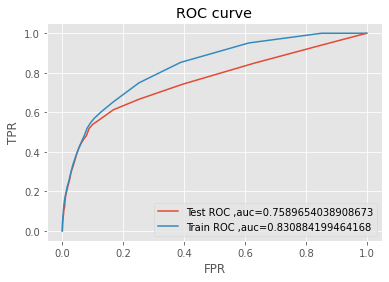

AUC on Test data is 0.7589654038908673
AUC on Train data is 0.830884199464168
---------------------------


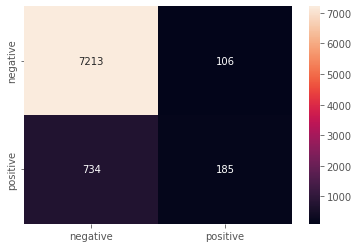

In [ ]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
results1 = pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 49",0.8209,0.7657]
results1.loc[0] = new

# **2. KNN kd Tree**

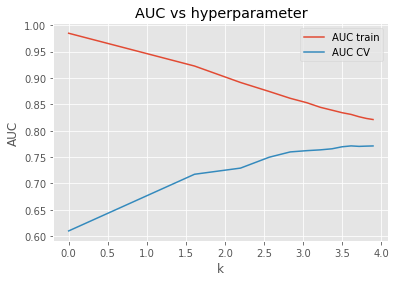

optimal alpha for which auc is maximum :  37


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

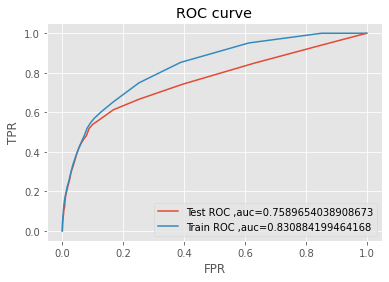

AUC on Test data is 0.7589654038908673
AUC on Train data is 0.830884199464168
---------------------------


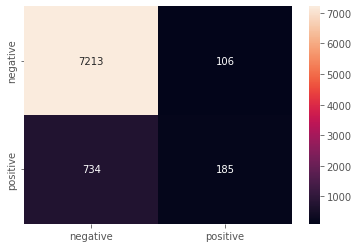

In [172]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [173]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 49",0.8209,0.7657]
results1.loc[1] = new

# **3. Logistic Regression with L1 regularization**

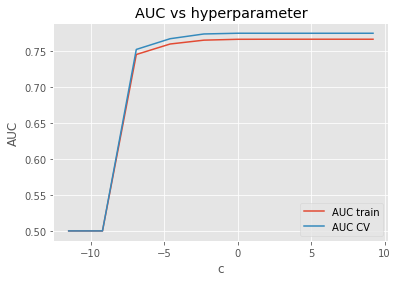

optimal c for which auc is maximum :  1


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

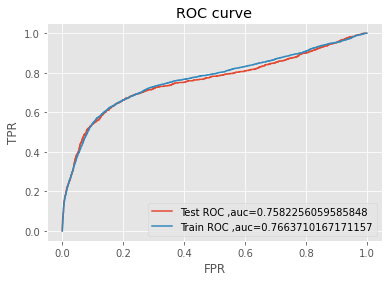

AUC on Test data is 0.7582256059585848
AUC on Train data is 0.7663710167171157
---------------------------


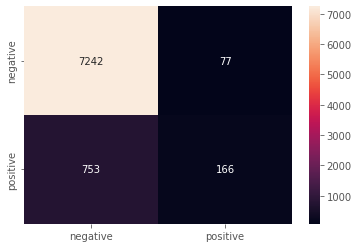

In [177]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l1',C=optimal_c,solver='liblinear')
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [178]:
new = ['Logistic Regression with L1','LogisticRegression',"c = 1",0.7675,0.7593]
results1.loc[2] = new

# **4. Logistic Regression with L2 regularization**

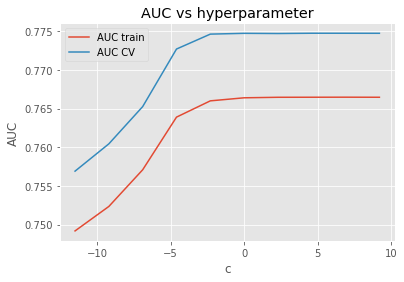

optimal c for which auc is maximum :  100


In [179]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

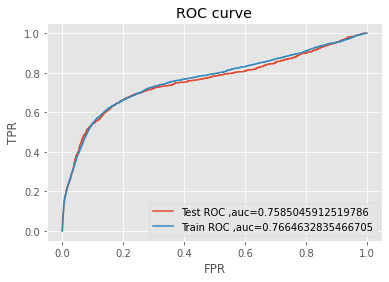

AUC on Test data is 0.7585045912519786
AUC on Train data is 0.7664632835466705
---------------------------


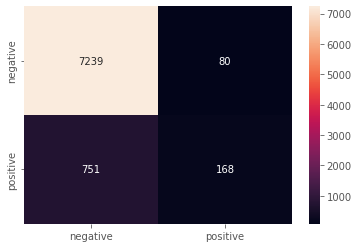

In [180]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [181]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 1",0.7676,0.7593]
results1.loc[3] = new

# **5.Linear SVM**

In [182]:
import warnings
warnings.filterwarnings("ignore")

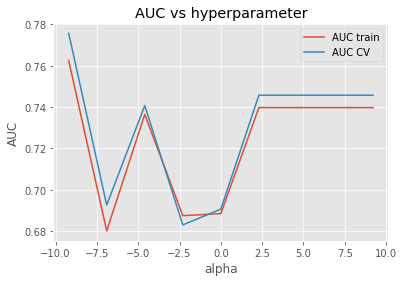

optimal alpha for which auc is maximum :  0.0001


In [183]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

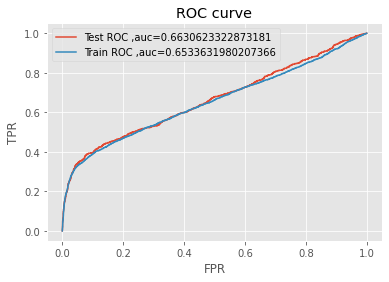

AUC on Test data is 0.6630623322873181
AUC on Train data is 0.6533631980207366
---------------------------


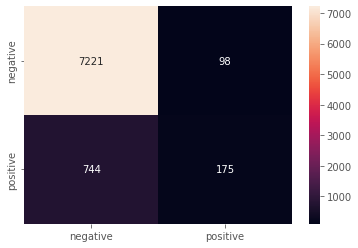

In [184]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [185]:
new = ['Linear SVM','SGDClassifier',"alpha = 0.0001",0.7113,0.7164]
results1.loc[4] = new

# **6. RBF SVM**

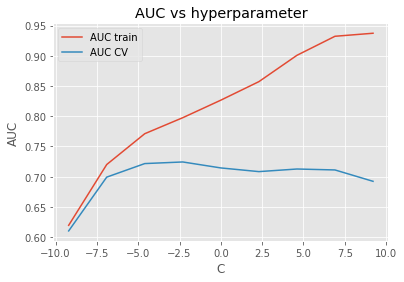

optimal C for which auc is maximum :  [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]


In [186]:
from sklearn.svm import SVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(ohe_x_train,y_train)
    prob_cv = clf.predict_proba(ohe_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(ohe_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',C)

In [187]:
print('optimal C for which auc is maximum : ',optimal_C)

optimal C for which auc is maximum :  0.1


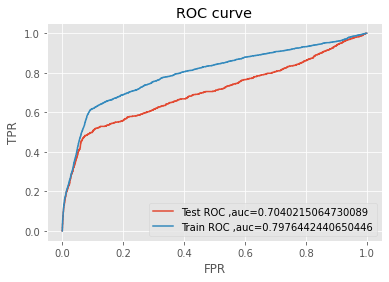

AUC on Test data is 0.7040215064730089
AUC on Train data is 0.7976442440650446
---------------------------


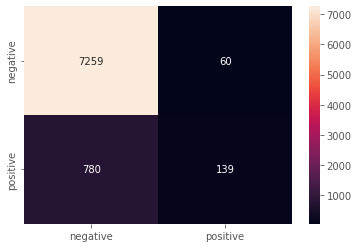

In [188]:
#Testing AUC on Test data
model =SVC(C = optimal_C)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(ohe_x_train,y_train)
pred_test = clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [189]:
new = ['RBF SVM','SVC',"alpha = 10 ",0.7883,0.7008]
results1.loc[5] = new

# **7. Decision Tree**

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 10


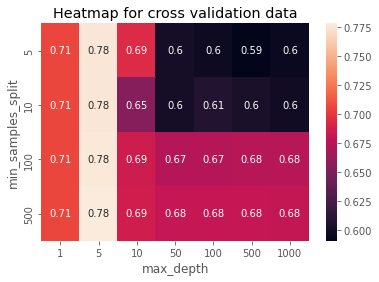

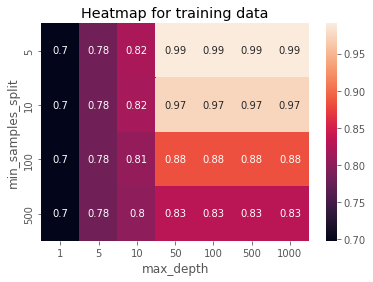

In [191]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

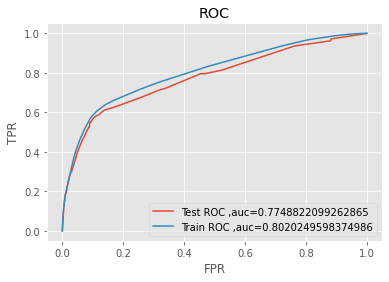

AUC on Test data is 0.7748822099262865
AUC on Train data is 0.8020249598374986
---------------------------


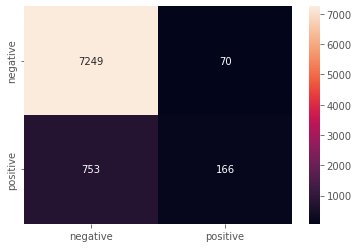

In [192]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 10,min_samples_split = 500)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [193]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 10 & min_samples_split = 500",0.8112,0.7964]
results1.loc[6] = new

# **8. Random Forest**

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 100
optimal max_depth 10


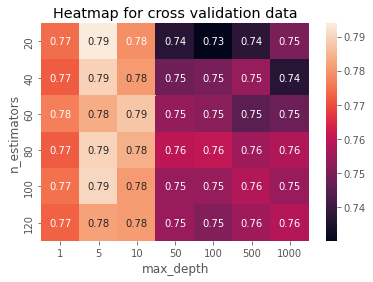

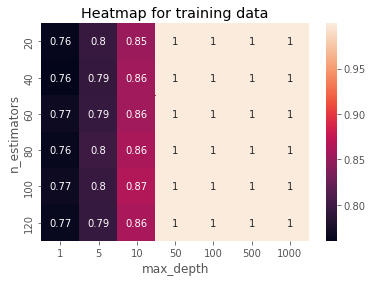

In [195]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [196]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

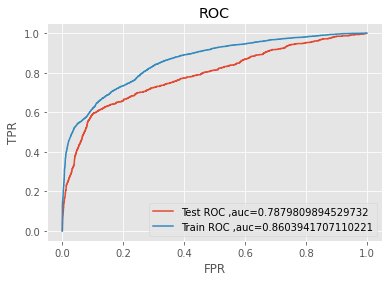

AUC on Test data is 0.7879809894529732
AUC on Train data is 0.8603941707110221
---------------------------


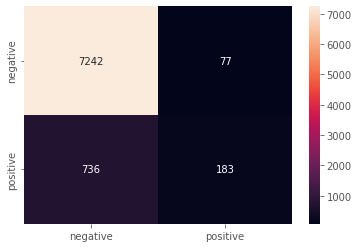

In [197]:
#training our model for max_depth=1000,n_estimators = 120
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [198]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 60",0.8556,0.7957]
results1.loc[7] = new

# **9. XGBoost**

In [199]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(ohe_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 80
optimal max_depth 5


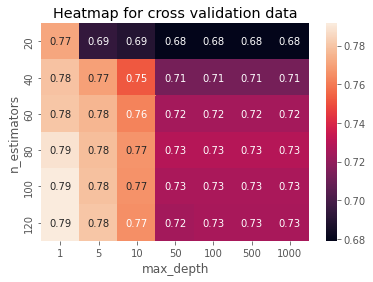

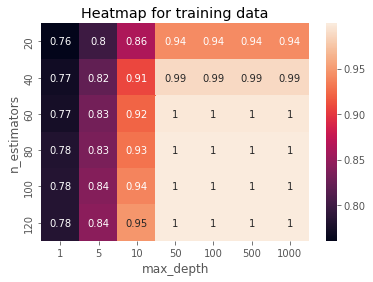

In [200]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(ohe_x_train,y_train)
        pred_cv = clf.predict_proba(ohe_x_cv)[:,1]
        pred_train = clf.predict_proba(ohe_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

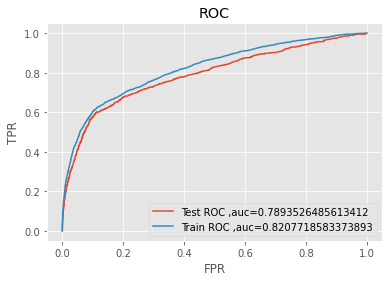

AUC on Test data is 0.7893526485613412
AUC on Train data is 0.8207718583373893
---------------------------


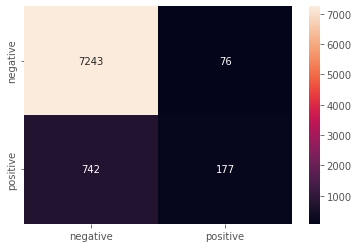

In [201]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 40)
clf.fit(ohe_x_train,y_train)
pred_test =clf.predict_proba(ohe_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(ohe_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [202]:
new = ['XGBOOST','XGBClassifier',"max_depth = 5 & n_estimators = 40",0.8166,0.8035]
results1.loc[8] = new

In [241]:
results1

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 49,0.8209,0.7657
1,KNN with kd-tree,KNeighborsClassifier,k = 49,0.8209,0.7657
2,Logistic Regression with L1,LogisticRegression,c = 1,0.7675,0.7593
3,Logistic Regression with L2,LogisticRegression,c = 1,0.7676,0.7593
4,Linear SVM,SGDClassifier,alpha = 0.0001,0.7113,0.7164
5,RBF SVM,SVC,alpha = 10,0.7883,0.7008
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8112,0.7964
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 60,0.8556,0.7957
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 40,0.8166,0.8035


# <font size='18'> **Machine Learning Models - Response Coding**

# **Response Coding**

In [206]:
y_valus ={'yes' : 1, 'no' : 0}
data['y'] = data['y'].map(lambda x: y_valus[x])
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [207]:
y = data['y']

In [208]:
data.drop(['y'], axis = 1, inplace = True)

In [209]:
data.shape

(41188, 19)

In [210]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [211]:
#splitting the data 
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, y, test_size=0.2, random_state=0)
x_train, x_cv, y_train, y_cv = model_selection.train_test_split(x_train, y_train, test_size=0.2)

In [212]:
print("the shape of x_train data,{} and shape of x_test data {}:".format(x_train.shape,x_test.shape))
print("the shape of y_train data,{} and shape of y_test data {}:".format(y_train.shape,y_test.shape))
print("the shape of x_cv data,{} and shape of y_cv data {}:".format(x_cv.shape,y_cv.shape))

the shape of x_train data,(26360, 19) and shape of x_test data (8238, 19):
the shape of y_train data,(26360,) and shape of y_test data (8238,):
the shape of x_cv data,(6590, 19) and shape of y_cv data (6590,):


In [213]:
#Numerical features
real_feature_x_train_age = ['age']
real_feature_x_train_campaign = ['campaign']
real_feature_x_train_previous = ['previous']
real_feature_x_train_emp_var_rate = ['emp.var.rate']
real_feature_x_train_cons_price_idx = ['cons.price.idx']
real_feature_x_train_cons_conf_idx = ['cons.conf.idx']
real_feature_x_train_euribor3m = ['euribor3m']
real_feature_x_train_nr_employed = ['nr.employed']

real_feature_x_test_age = ['age']
real_feature_x_test_campaign = ['campaign']
real_feature_x_test_previous = ['previous']
real_feature_x_test_emp_var_rate = ['emp.var.rate']
real_feature_x_test_cons_price_idx = ['cons.price.idx']
real_feature_x_test_cons_conf_idx = ['cons.conf.idx']
real_feature_x_test_euribor3m = ['euribor3m']
real_feature_x_test_nr_employed = ['nr.employed']

real_feature_x_cv_age = ['age']
real_feature_x_cv_campaign = ['campaign']
real_feature_x_cv_previous = ['previous']
real_feature_x_cv_emp_var_rate = ['emp.var.rate']
real_feature_x_cv_cons_price_idx = ['cons.price.idx']
real_feature_x_cv_cons_conf_idx = ['cons.conf.idx']
real_feature_x_cv_euribor3m = ['euribor3m']
real_feature_x_cv_nr_employed = ['nr.employed']

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
SS = StandardScaler()
SS.fit(x_train[real_feature_x_train_age])
x_train_real_feature_age_scale = SS.transform(x_train[real_feature_x_train_age])
x_test_real_feature_age_scale = SS.transform(x_test[real_feature_x_test_age])
x_cv_real_feature_age_scale = SS.transform(x_cv[real_feature_x_cv_age])

In [216]:
SS.fit(x_train[real_feature_x_train_campaign])
x_train_real_feature_campaign_scale = SS.transform(x_train[real_feature_x_train_campaign])
x_test_real_feature_campaign_scale = SS.transform(x_test[real_feature_x_test_campaign])
x_cv_real_feature_campaign_scale = SS.transform(x_cv[real_feature_x_cv_campaign])

In [217]:
SS.fit(x_train[real_feature_x_train_previous])
x_train_real_feature_previous_scale = SS.transform(x_train[real_feature_x_train_previous])
x_test_real_feature_previous_scale = SS.transform(x_test[real_feature_x_test_previous])
x_cv_real_feature_previous_scale = SS.transform(x_cv[real_feature_x_cv_previous])

In [218]:
SS.fit(x_train[real_feature_x_train_emp_var_rate])
x_train_real_feature_emp_var_rate_scale = SS.transform(x_train[real_feature_x_train_emp_var_rate])
x_test_real_feature_emp_var_rate_scale = SS.transform(x_test[real_feature_x_test_emp_var_rate])
x_cv_real_feature_emp_var_rate_scale = SS.transform(x_cv[real_feature_x_cv_emp_var_rate])

In [219]:
SS.fit(x_train[real_feature_x_train_cons_price_idx])
x_train_real_feature_cons_price_idx_scale = SS.transform(x_train[real_feature_x_train_cons_price_idx])
x_test_real_feature_cons_price_idx_scale = SS.transform(x_test[real_feature_x_test_cons_price_idx])
x_cv_real_feature_cons_price_idx_scale = SS.transform(x_cv[real_feature_x_cv_cons_price_idx])

In [220]:
SS.fit(x_train[real_feature_x_train_cons_conf_idx])
x_train_real_feature_cons_conf_idx_scale = SS.transform(x_train[real_feature_x_train_cons_conf_idx])
x_test_real_feature_cons_conf_idx_scale = SS.transform(x_test[real_feature_x_test_cons_conf_idx])
x_cv_real_feature_cons_conf_idx_scale = SS.transform(x_cv[real_feature_x_cv_cons_conf_idx])

In [221]:
SS.fit(x_train[real_feature_x_train_euribor3m])
x_train_real_feature_euribor3m_scale = SS.transform(x_train[real_feature_x_train_euribor3m])
x_test_real_feature_euribor3m_scale = SS.transform(x_test[real_feature_x_test_euribor3m])
x_cv_real_feature_euribor3m_scale = SS.transform(x_cv[real_feature_x_cv_euribor3m])

In [222]:
SS.fit(x_train[real_feature_x_train_nr_employed])
x_train_real_feature_nr_employed_scale = SS.transform(x_train[real_feature_x_train_nr_employed])
x_test_real_feature_nr_employed_scale = SS.transform(x_test[real_feature_x_test_nr_employed])
x_cv_real_feature_nr_employed_scale = SS.transform(x_cv[real_feature_x_cv_nr_employed])

In [223]:
real_feature_x_train = np.concatenate(
    (x_train_real_feature_age_scale,x_train_real_feature_campaign_scale,x_train_real_feature_previous_scale,
     x_train_real_feature_emp_var_rate_scale,x_train_real_feature_cons_price_idx_scale,x_train_real_feature_cons_conf_idx_scale,
     x_train_real_feature_euribor3m_scale,x_train_real_feature_nr_employed_scale),axis = 1)

real_feature_x_test = np.concatenate(
    (x_test_real_feature_age_scale,x_test_real_feature_campaign_scale,x_test_real_feature_previous_scale,
     x_test_real_feature_emp_var_rate_scale,x_test_real_feature_cons_price_idx_scale,x_test_real_feature_cons_conf_idx_scale,
     x_test_real_feature_euribor3m_scale,x_test_real_feature_nr_employed_scale),axis = 1)

real_feature_x_cv = np.concatenate(
    (x_cv_real_feature_age_scale,x_cv_real_feature_campaign_scale,x_cv_real_feature_previous_scale,
     x_cv_real_feature_emp_var_rate_scale,x_cv_real_feature_cons_price_idx_scale,x_cv_real_feature_cons_conf_idx_scale,
     x_cv_real_feature_euribor3m_scale,x_cv_real_feature_nr_employed_scale),axis = 1)

In [224]:
def get_gv_fea_dict(alpha, feature, df):   
    value_count = x_train[feature].value_counts()

    gv_dict = dict()
    for i, denominator in value_count.items():
        vec = []
        for k in range(1,3):
            cls_cnt = x_train.loc[(y_train==k) & (x_train[feature]==i)]
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))
        gv_dict[i]=vec
    return gv_dict

def get_gv_feature(alpha, feature, df):
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    value_count = x_train[feature].value_counts()
    
    
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/2,1/2])
    return gv_fea

In [225]:
#response-coding of the job feature
# alpha is used for laplace smoothing
alpha = 1
# train job feature
train_job_feature_responseCoding = np.array(get_gv_feature(alpha, 'job', x_train))
# test job feature
test_job_feature_responseCoding = np.array(get_gv_feature(alpha, 'job', x_test))
# cross validation job feature
cv_job_feature_responseCoding = np.array(get_gv_feature(alpha, 'job', x_cv))

In [226]:
train_job_feature_responseCoding.shape

(26360, 2)

In [227]:
#response-coding of the marital feature
# alpha is used for laplace smoothing
alpha = 1
# train marital feature
train_marital_feature_responseCoding = np.array(get_gv_feature(alpha, 'marital', x_train))
# test marital feature
test_marital_feature_responseCoding = np.array(get_gv_feature(alpha, 'marital', x_test))
# cross validation marital feature
cv_marital_feature_responseCoding = np.array(get_gv_feature(alpha, 'marital', x_cv))

In [228]:
train_marital_feature_responseCoding.shape

(26360, 2)

In [229]:
#response-coding of the education feature
# alpha is used for laplace smoothing
alpha = 1
# train education feature
train_education_feature_responseCoding = np.array(get_gv_feature(alpha, 'education', x_train))
# test education feature
test_education_feature_responseCoding = np.array(get_gv_feature(alpha, 'education', x_test))
# cross validation education feature
cv_education_feature_responseCoding = np.array(get_gv_feature(alpha, 'education', x_cv))

In [230]:
#response-coding of the housing feature
# alpha is used for laplace smoothing
alpha = 1
# train housing feature
train_housing_feature_responseCoding = np.array(get_gv_feature(alpha, 'housing', x_train))
# test housing feature
test_housing_feature_responseCoding = np.array(get_gv_feature(alpha, 'housing', x_test))
# cross validation housing feature
cv_housing_feature_responseCoding = np.array(get_gv_feature(alpha, 'housing', x_cv))

In [231]:
#response-coding of the loan feature
# alpha is used for laplace smoothing
alpha = 1
# train loan feature
train_loan_feature_responseCoding = np.array(get_gv_feature(alpha, 'loan', x_train))
# test loan feature
test_loan_feature_responseCoding = np.array(get_gv_feature(alpha, 'loan', x_test))
# cross validation loan feature
cv_loan_feature_responseCoding = np.array(get_gv_feature(alpha, 'loan', x_cv))

In [232]:
#response-coding of the poutcome feature
# alpha is used for laplace smoothing
alpha = 1
# train poutcome feature
train_poutcome_feature_responseCoding = np.array(get_gv_feature(alpha, 'poutcome', x_train))
# test poutcome feature
test_poutcome_feature_responseCoding = np.array(get_gv_feature(alpha, 'poutcome', x_test))
# cross validation poutcome feature
cv_poutcome_feature_responseCoding = np.array(get_gv_feature(alpha, 'poutcome', x_cv))

In [233]:
import numpy as np
cat_x_train = np.concatenate(
    (train_job_feature_responseCoding,train_marital_feature_responseCoding,
     train_education_feature_responseCoding,train_housing_feature_responseCoding,
     train_loan_feature_responseCoding,train_poutcome_feature_responseCoding),axis = 1)
    
cat_x_test = np.concatenate(
    (test_job_feature_responseCoding,test_marital_feature_responseCoding,
     test_education_feature_responseCoding,test_housing_feature_responseCoding,
     test_loan_feature_responseCoding,test_poutcome_feature_responseCoding),axis = 1)

cat_x_cv = np.concatenate(
    (cv_job_feature_responseCoding,cv_marital_feature_responseCoding,
     cv_education_feature_responseCoding,cv_housing_feature_responseCoding,
     cv_loan_feature_responseCoding,cv_poutcome_feature_responseCoding),axis = 1)

In [234]:
cat_x_train.shape

(26360, 12)

In [235]:
cat_x_test.shape

(8238, 12)

In [236]:
cat_x_cv.shape

(6590, 12)

In [237]:
real_feature_x_train.shape

(26360, 8)

In [238]:
type(real_feature_x_train)

numpy.ndarray

In [239]:
type(cat_x_cv)

numpy.ndarray

In [240]:
rc_x_train = np.concatenate((cat_x_train,real_feature_x_train),axis = 1)
rc_x_test = np.concatenate((cat_x_test,real_feature_x_test),axis = 1)
rc_x_cv = np.concatenate((cat_x_cv,real_feature_x_cv),axis = 1)

# **1. KNN - Brute Force**

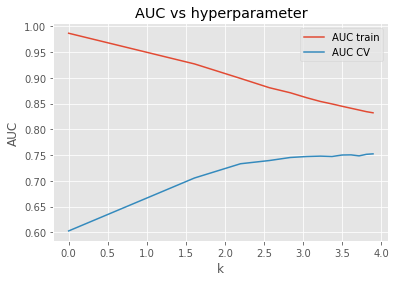

optimal alpha for which auc is maximum :  49


In [242]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='brute')
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

In [243]:
from sklearn.metrics import confusion_matrix

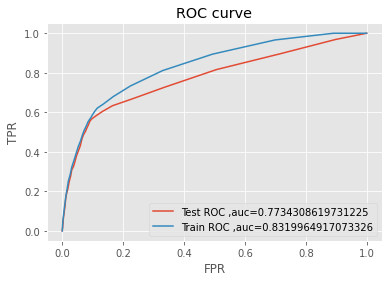

AUC on Test data is 0.7734308619731225
AUC on Train data is 0.8319964917073326
---------------------------


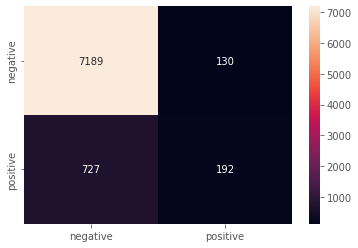

In [244]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='brute')
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [245]:
results2 = pd.DataFrame(columns=['model', 'Classifier' ,"hyper perameter", 'Train-AUC', 'Test-AUC' ])
new = ['KNN with Brute force','KNeighborsClassifier',"k = 49",0.8247,0.7707]
results2.loc[0] = new

# **2. KNN kd-tree**

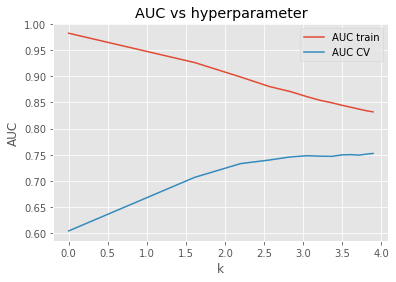

optimal alpha for which auc is maximum :  49


In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import math

k = list(range(1,50,4))

train_auc = []
cv_auc = []

for i in k:
    clf = KNeighborsClassifier(n_neighbors = i,algorithm='kd_tree')
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_k = k[cv_auc.index(max(cv_auc))]
k = [math.log(x) for x in k]

#plot auc vs alpha
x = plt.subplot( )
x.plot(k, train_auc, label='AUC train')
x.plot(k, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('k')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_k)

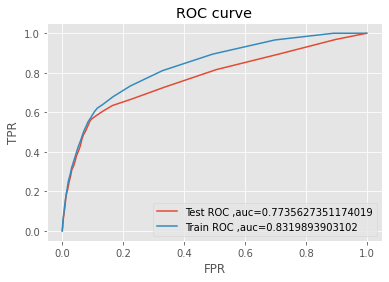

AUC on Test data is 0.7735627351174019
AUC on Train data is 0.8319893903102
---------------------------


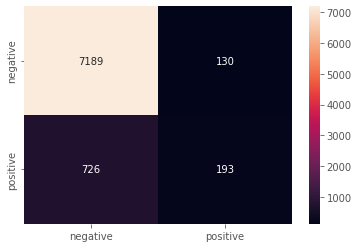

In [258]:
#Testing AUC on Test data
clf = KNeighborsClassifier(n_neighbors = optimal_k,algorithm='kd_tree')
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [259]:
new = ['KNN with kd-tree','KNeighborsClassifier',"k = 49",0.8246,0.7708]
results2.loc[1] = new

# **3. Logistic Regression with L1 regularization**

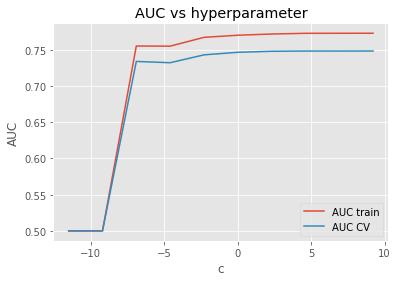

optimal c for which auc is maximum :  10000


In [249]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import math

c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l1',C=i,solver='liblinear')
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

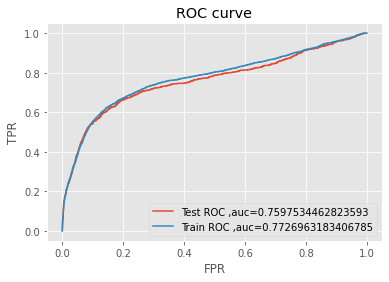

AUC on Test data is 0.7597534462823593
AUC on Train data is 0.7726963183406785
---------------------------


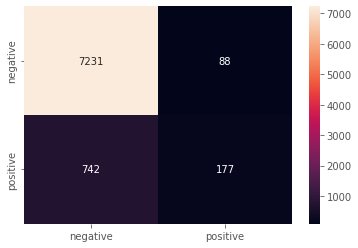

In [250]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l1',C=optimal_c,solver='liblinear')
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
from sklearn.metrics import confusion_matrix
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [251]:
new = ['Logistic Regression with L1','LogisticRegression',"c = 1000",0.7665,0.7591]
results2.loc[2] = new

# **4. Logistic Regression with L2 regularization**

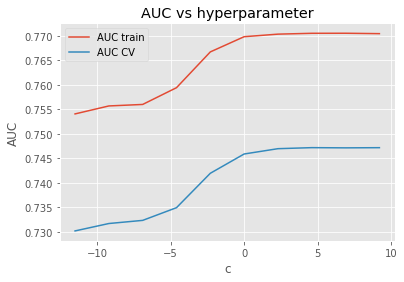

optimal c for which auc is maximum :  100


In [252]:
c = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001]

train_auc = []
cv_auc = []

for i in c:
    clf = LogisticRegression(penalty='l2',C=i)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_c= c[cv_auc.index(max(cv_auc))]
c = [math.log(x) for x in c]

#plot auc vs alpha
x = plt.subplot( )
x.plot(c, train_auc, label='AUC train')
x.plot(c, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('c')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal c for which auc is maximum : ',optimal_c)

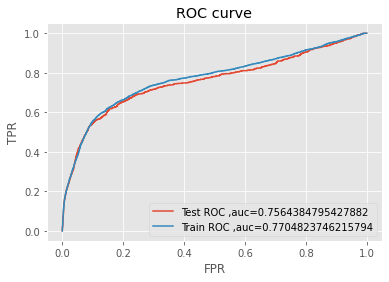

AUC on Test data is 0.7564384795427882
AUC on Train data is 0.7704823746215794
---------------------------


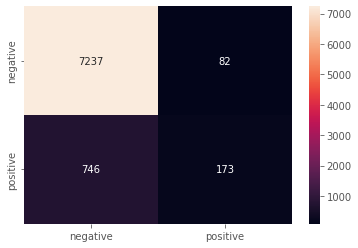

In [253]:
#Testing AUC on Test data
clf = LogisticRegression(penalty='l2',C=optimal_c)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train) 


#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [254]:
new = ['Logistic Regression with L2','LogisticRegression',"c = 10000",0.7665,0.7584]
results2.loc[3] = new

# **5. Linear SVM**

In [255]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
import math

alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in alpha:
    model = SGDClassifier(alpha=i, loss = "hinge") 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_alpha= alpha[cv_auc.index(max(cv_auc))]
alpha=[math.log(x) for x in alpha]

#plot auc vs alpha
x = plt.subplot( )
x.plot(alpha, train_auc, label='AUC train')
x.plot(alpha, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal alpha for which auc is maximum : ',optimal_alpha)

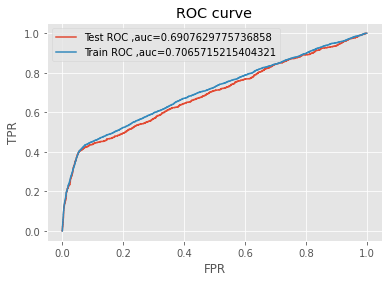

AUC on Test data is 0.6907629775736858
AUC on Train data is 0.7065715215404321
---------------------------


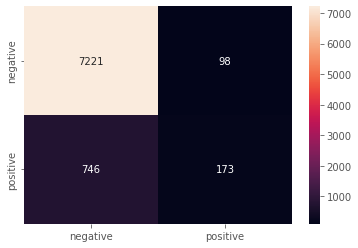

In [260]:
#Testing AUC on Test data
model = SGDClassifier(alpha = optimal_alpha)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [261]:
new = ['Linear SVM','SGDClassifier',"alpha = 1",0.7565,0.7449]
results2.loc[4] = new

# **6. RBF SVM**

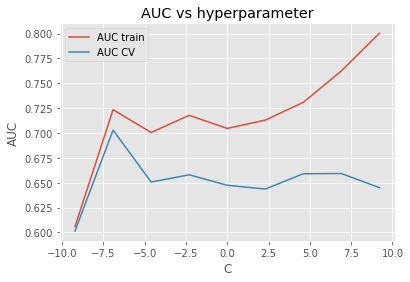

optimal C for which auc is maximum :  [9.210340371976184, 6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -4.605170185988091, -6.907755278982137, -9.210340371976182]


In [262]:
from sklearn.svm import SVC
C = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]

train_auc = []
cv_auc = []

for i in C:
    model = SVC(C=i) 
    clf = CalibratedClassifierCV(model, cv=3)
    clf.fit(rc_x_train,y_train)
    prob_cv = clf.predict_proba(rc_x_cv)[:,1]
    cv_auc.append(roc_auc_score(y_cv,prob_cv))
    prob_train = clf.predict_proba(rc_x_train)[:,1]
    train_auc.append(roc_auc_score(y_train,prob_train))
optimal_C= C[cv_auc.index(max(cv_auc))]
C=[math.log(x) for x in C]

#plot auc vs alpha
x = plt.subplot( )
x.plot(C, train_auc, label='AUC train')
x.plot(C, cv_auc, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C')
plt.ylabel('AUC')
x.legend()
plt.show()

print('optimal C for which auc is maximum : ',C)

In [263]:
print('optimal C for which auc is maximum : ',optimal_C)

optimal C for which auc is maximum :  0.001


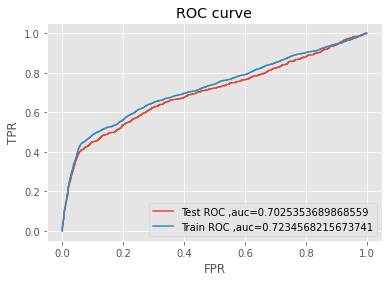

AUC on Test data is 0.7025353689868559
AUC on Train data is 0.7234568215673741
---------------------------


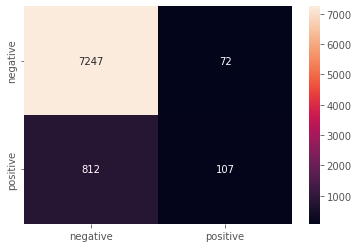

In [264]:
#Testing AUC on Test data
model =SVC(C = optimal_C)
clf = CalibratedClassifierCV(model, cv=3)
clf.fit(rc_x_train,y_train)
pred_test = clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2 = metrics.roc_curve(y_train,pred_train)

#plot ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label ='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [265]:
new = ['RBF SVM','SVC',"alpha = 10000 ",0.7751,0.6916]
results2.loc[5] = new

# **7. Decision Tree**

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
min_samples =  [5, 10, 100, 500]


param_grid={'min_samples_split':min_samples , 'max_depth':dept}
clf = DecisionTreeClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal min_samples_split",model.best_estimator_.min_samples_split)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal min_samples_split 500
optimal max_depth 50


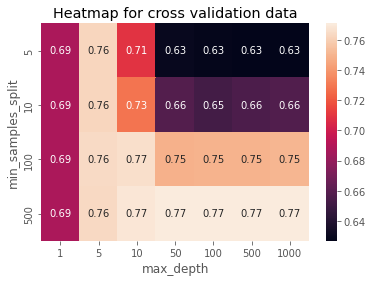

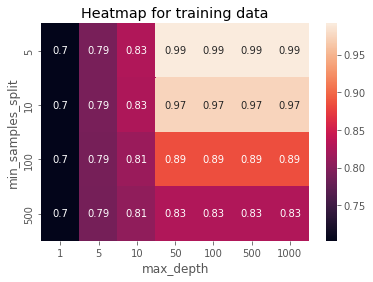

In [267]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in min_samples:
    for d in dept:
        clf = DecisionTreeClassifier(max_depth = d,min_samples_split = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'min_samples_split': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("min_samples_split", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

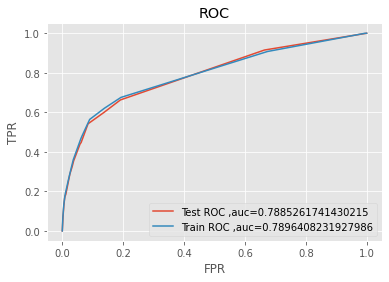

AUC on Test data is 0.7885261741430215
AUC on Train data is 0.7896408231927986
---------------------------


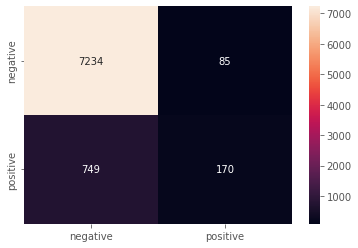

In [268]:
#training our model for max_depth=50,min_samples_split=500
clf = DecisionTreeClassifier(max_depth = 5,min_samples_split = 500)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [269]:
new = ['Decision Tree','DecisionTreeClassifier',"max_depth = 5 & min_samples_split = 500",0.7848,0.7880]
results2.loc[6] = new

# **8. Random Forest**

In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 120
optimal max_depth 10


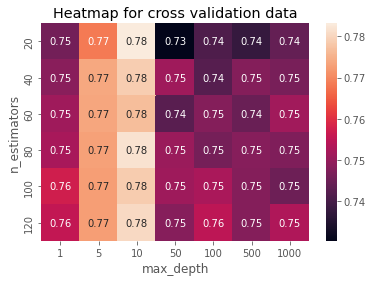

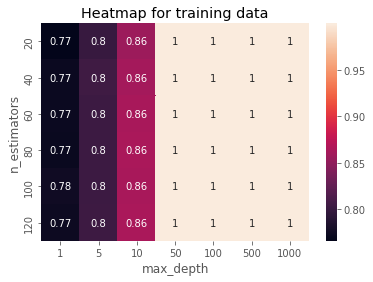

In [271]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = RandomForestClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

In [272]:
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

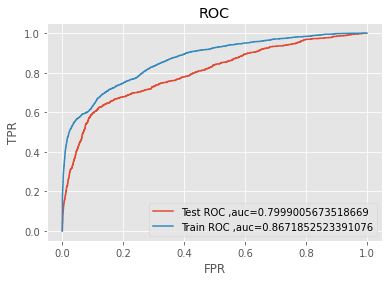

AUC on Test data is 0.7999005673518669
AUC on Train data is 0.8671852523391076
---------------------------


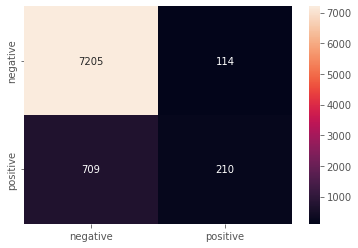

In [273]:
#training our model for max_depth=1000,n_estimators = 120
clf = RandomForestClassifier(max_depth = 10,n_estimators = 120)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [274]:
new = ['Random Forest','RandomForestClassifier',"max_depth = 10 & min_samples_split = 120",0.8613,0.7984]
results2.loc[7] = new

# **9. XGBOOST**

In [275]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(rc_x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 60
optimal max_depth 5


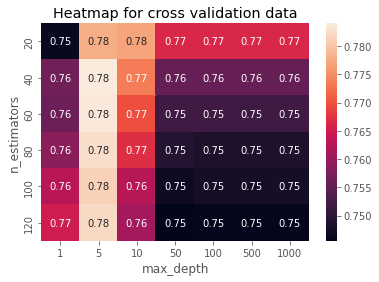

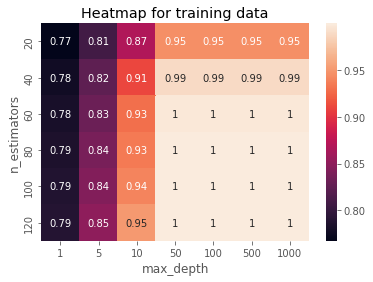

In [276]:
import seaborn as sns
X = []
Y = []
cv_auc = []
train_auc = []
for n in n_estimators:
    for d in dept:
        clf = XGBClassifier(max_depth = d,n_estimators = n)
        clf.fit(rc_x_train,y_train)
        pred_cv = clf.predict_proba(rc_x_cv)[:,1]
        pred_train = clf.predict_proba(rc_x_train)[:,1]
        X.append(n)
        Y.append(d)
        cv_auc.append(roc_auc_score(y_cv,pred_cv))
        train_auc.append(roc_auc_score(y_train,pred_train))
optimal_depth=Y[cv_auc.index(max(cv_auc))]   
optimal_n_estimator=X[cv_auc.index(max(cv_auc))]
        
#Heatmap for cross validation data        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': cv_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

#Heatmap for training data
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': train_auc})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for training data')
plt.show()

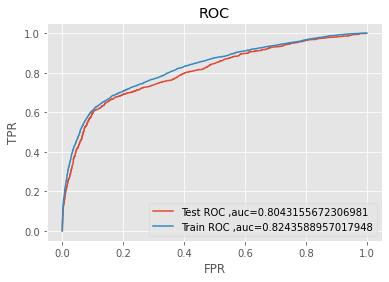

AUC on Test data is 0.8043155672306981
AUC on Train data is 0.8243588957017948
---------------------------


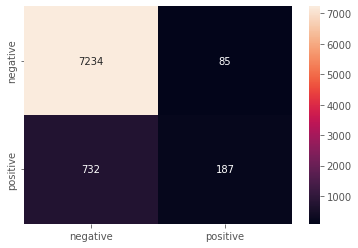

In [277]:
#training our model for max_depth=50,min_samples_split=500
clf = XGBClassifier(max_depth = 5,n_estimators = 40)
clf.fit(rc_x_train,y_train)
pred_test =clf.predict_proba(rc_x_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_test)
pred_train = clf.predict_proba(rc_x_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred_train)

#ROC curve
x = plt.subplot( )
x.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,pred_test)))
x.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred_train)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
x.legend()
plt.show()

print("AUC on Test data is " +str(roc_auc_score(y_test,pred_test)))
print("AUC on Train data is " +str(roc_auc_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names = ['negative','positive']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [278]:
new = ['XGBOOST','XGBClassifier',"max_depth = 5 & n_estimators = 40",0.8171,0.8016]
results2.loc[8] = new

# **LabelEncoder Performance Table**

In [279]:
results

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 37,0.8288,0.7587
1,KNN with kd-tree,KNeighborsClassifier,k = 33,0.8322,0.7573
2,Logistic Regression with L1,LogisticRegression,c = 10000,0.7642,0.7593
3,Logistic Regression with L2,LogisticRegression,c = 10,0.7644,0.7595
4,Linear SVM,SGDClassifier,alpha = 0.01,0.7537,0.7434
5,RBF SVM,SVC,c = 0.01,0.8771,0.7272
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8131,0.7925
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 100,0.8650,0.8035
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 60,0.8267,0.8091


# **OneHotEncoder Performance Table**

In [280]:
results1

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 49,0.8209,0.7657
1,KNN with kd-tree,KNeighborsClassifier,k = 49,0.8209,0.7657
2,Logistic Regression with L1,LogisticRegression,c = 1,0.7675,0.7593
3,Logistic Regression with L2,LogisticRegression,c = 1,0.7676,0.7593
4,Linear SVM,SGDClassifier,alpha = 0.0001,0.7113,0.7164
5,RBF SVM,SVC,alpha = 10,0.7883,0.7008
6,Decision Tree,DecisionTreeClassifier,max_depth = 10 & min_samples_split = 500,0.8112,0.7964
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 60,0.8556,0.7957
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 40,0.8166,0.8035


# **Response-Coding Performance Table**

In [281]:
results2

,model,Classifier,hyper perameter,Train-AUC,Test-AUC
0,KNN with Brute force,KNeighborsClassifier,k = 49,0.8247,0.7707
1,KNN with kd-tree,KNeighborsClassifier,k = 49,0.8246,0.7708
2,Logistic Regression with L1,LogisticRegression,c = 1000,0.7665,0.7591
3,Logistic Regression with L2,LogisticRegression,c = 10000,0.7665,0.7584
4,Linear SVM,SGDClassifier,alpha = 1,0.7565,0.7449
5,RBF SVM,SVC,alpha = 10000,0.7751,0.6916
6,Decision Tree,DecisionTreeClassifier,max_depth = 5 & min_samples_split = 500,0.7848,0.7880
7,Random Forest,RandomForestClassifier,max_depth = 10 & min_samples_split = 120,0.8613,0.7984
8,XGBOOST,XGBClassifier,max_depth = 5 & n_estimators = 40,0.8171,0.8016


# **Conclusion:**

<b> 
1. We load the data using pandas and do some Exploratory Data Analysis techniques.<br>

2. After applying the EDA we know some features are not importent then remove that features.<br>

3. We are using AUC as metric because this is higly imbalanced dataset.<br>

4. We split the whole data as train,test and cv then apply LabelEncoder to encode the all catagorical features.<br>

5. Apply all Machine Learning algorithms like KNN, Logistic Regression,Linear SVM, RBF SVM, Decision Tree, Random Forest and XGBoost with hyperparameter tuning.<br>

6. Decision Tree, Random Forest and XGBoost with some hyperparameter tuning gives best AUC values = 0.7925 , 0.8035 and 0.8091<br>

7. Now we use OneHotEncoder to encode the all catagorical features.<br>

8. Apply all these Machine Learning algorithms with some hyperparameter tunings.<br>

9. When we use OneHotEncoder Decision Tree, Random Forest and XGBoost gives best Auc = 0.7964, 0.7957 & 0.8035<br>

10. Fianlly we use respoce-coding to encode the categorical data and apply some machine learnig model with hyperparameter tuning.<br>

11. Random Forest and XGBoost gives best result AUC = 0.7984 & **0.8016**.